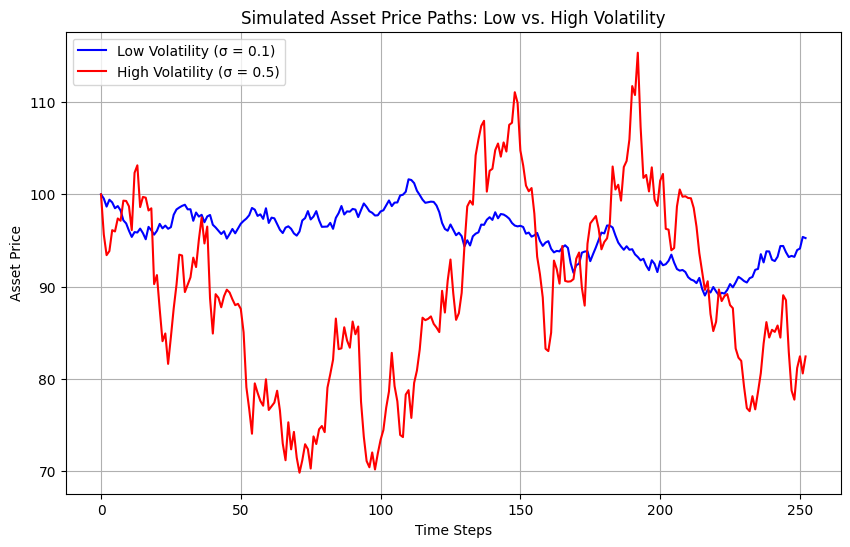

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
num_simulations = 2  # We'll simulate just 2 paths
time_steps = 252
T = 1
dt = T / time_steps

# --- Initial Values ---
S0 = 100
r = 0.05
q = 0.02

# --- Volatilities ---
sigma_low = 0.1  # Low volatility
sigma_high = 0.5  # High volatility

# --- Helper Function ---
def simulate_asset_price(S0, r, q, sigma, T, dt, num_simulations, time_steps):
    """Simulates asset price paths using Geometric Brownian Motion."""
    Z = np.random.standard_normal((time_steps, num_simulations))
    S = np.zeros((time_steps + 1, num_simulations))
    S[0] = S0
    for t in range(1, time_steps + 1):
        S[t] = S[t - 1] * np.exp((r - q - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z[t - 1])
    return S

# --- Simulate Paths ---
S_low_vol = simulate_asset_price(S0, r, q, sigma_low, T, dt, 1, time_steps)  # 1 path with low vol
S_high_vol = simulate_asset_price(S0, r, q, sigma_high, T, dt, 1, time_steps)  # 1 path with high vol

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(S_low_vol, label=f"Low Volatility (σ = {sigma_low})", color="blue")
plt.plot(S_high_vol, label=f"High Volatility (σ = {sigma_high})", color="red")
plt.title("Simulated Asset Price Paths: Low vs. High Volatility")
plt.xlabel("Time Steps")
plt.ylabel("Asset Price")
plt.legend()
plt.grid(True)
plt.show()